In [1]:
import numpy as np
import pandas as pd 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('comments.csv')
df2 = pd.read_csv('comments_final2.csv')
df_books = pd.read_csv('book_data.csv')

In [3]:
df1.head()

,product_id,comment_id,title,thank_count,customer_id,rating,comment
0,74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ..."
1,74021317,16979365,Cực kì hài lòng,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ..."
2,74021317,14069617,Cực kì hài lòng,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không..."
3,74021317,8569824,Cực kì hài lòng,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên..."
4,74021317,18368714,Cực kì hài lòng,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141281 entries, 0 to 141280
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   product_id   141281 non-null  int64 
 1   comment_id   141281 non-null  int64 
 2   title        141277 non-null  object
 3   thank_count  141281 non-null  int64 
 4   customer_id  141281 non-null  int64 
 5   rating       141281 non-null  int64 
 6   comment      103263 non-null  object
dtypes: int64(5), object(2)
memory usage: 7.5+ MB


In [5]:
df1.describe()

,product_id,comment_id,thank_count,customer_id,rating
count,1.412810e+05,1.412810e+05,141281.000000,1.412810e+05,141281.000000
mean,9.302064e+07,1.391595e+07,0.902966,1.192041e+07,4.639513
std,6.516308e+07,4.574479e+06,6.151528,8.726579e+06,0.895394
min,3.353370e+05,1.161970e+05,0.000000,2.700000e+01,1.000000
25%,4.462753e+07,1.167244e+07,0.000000,5.280033e+06,5.000000
50%,7.790045e+07,1.557704e+07,0.000000,1.101454e+07,5.000000
75%,1.527431e+08,1.758605e+07,0.000000,1.904932e+07,5.000000
max,2.078530e+08,1.839260e+07,548.000000,2.857852e+07,5.000000


In [6]:
corr_matrix = df1.corr()
print(corr_matrix)

             product_id  comment_id  thank_count  customer_id    rating
product_id     1.000000    0.609231    -0.099810     0.117337  0.128042
comment_id     0.609231    1.000000    -0.206776     0.252598  0.172003
thank_count   -0.099810   -0.206776     1.000000    -0.064149 -0.060412
customer_id    0.117337    0.252598    -0.064149     1.000000  0.036464
rating         0.128042    0.172003    -0.060412     0.036464  1.000000


C:\Users\marsen\AppData\Local\Temp\ipykernel_28348\2610757592.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


In [7]:
grouped_data = df1.groupby('rating').mean()
print(grouped_data)

          product_id    comment_id  thank_count   customer_id
rating                                                       
1       7.135503e+07  1.195943e+07     2.677197  1.128462e+07
2       6.296448e+07  1.095105e+07     2.166235  1.038522e+07
3       6.847448e+07  1.150990e+07     1.488249  1.071674e+07
4       8.159221e+07  1.287065e+07     0.811892  1.166294e+07
5       9.713755e+07  1.430402e+07     0.787930  1.206918e+07


C:\Users\marsen\AppData\Local\Temp\ipykernel_28348\167905614.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df1.groupby('rating').mean()


Kết quả cho thấy, hầu hết những đánh giá được thích nhiều thường là đánh giá tiêu cực, điều này cho thấy </br>
người dùng có xu hướng tìm kiếm những đánh giá tiêu cực để có những đánh giá khách quan hơn về sản phẩm.

In [8]:
df1['text_count'] = df1['comment'].apply(lambda x: len(x.split()) if not pd.isna(x) else 0)


In [9]:
df1.head()

,product_id,comment_id,title,thank_count,customer_id,rating,comment,text_count
0,74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ...",220
1,74021317,16979365,Cực kì hài lòng,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ...",61
2,74021317,14069617,Cực kì hài lòng,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không...",204
3,74021317,8569824,Cực kì hài lòng,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên...",125
4,74021317,18368714,Cực kì hài lòng,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...,208


In [21]:
corr_matrix = df1[['text_count', 'rating', 'thank_count']].corr()
print(corr_matrix)

             text_count    rating  thank_count
text_count     1.000000 -0.143307     0.291823
rating        -0.143307  1.000000    -0.060412
thank_count    0.291823 -0.060412     1.000000


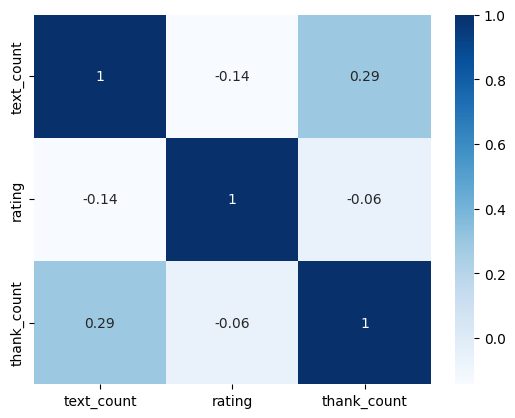

In [22]:
#corr plot
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

<AxesSubplot: xlabel='thank_count', ylabel='text_count'>

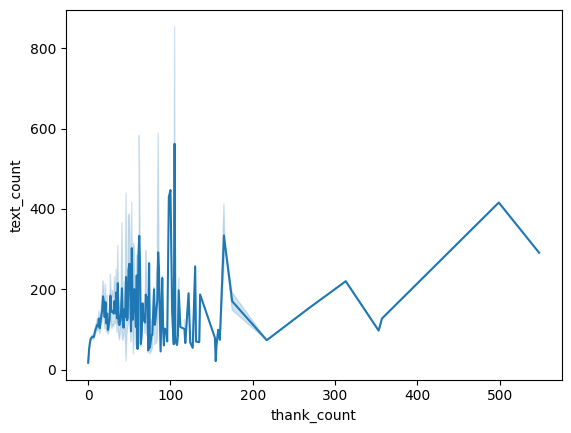

In [40]:
sns.lineplot(x='thank_count', y='text_count', data=df1)

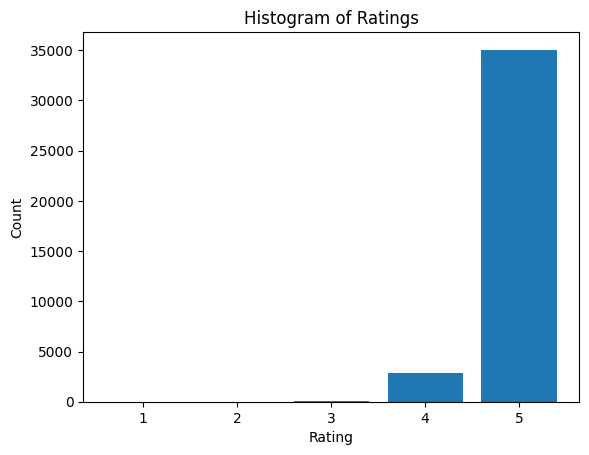

In [36]:
# Define the data
values = [35055, 2906, 45, 9, 3]
labels = [5, 4, 3, 2, 1]

# Create the histogram
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')

# Show the plot
plt.show()

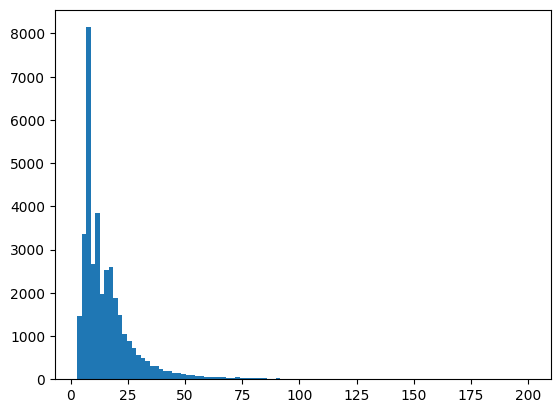

In [38]:
plt.hist(df2['word_count'], bins=100)
plt.show()

In [39]:
df2['word_count'].describe()

count    36932.000000
mean        16.460495
std         15.328011
min          3.000000
25%          7.000000
50%         11.000000
75%         20.000000
max        200.000000
Name: word_count, dtype: float64

In [26]:
df1['text_count'].describe()    

count    141281.000000
mean         26.187718
std          45.926484
min           0.000000
25%           0.000000
50%          13.000000
75%          33.000000
max        1221.000000
Name: text_count, dtype: float64

Tương tự với kết quả trên, từ bảng đo độ tương quan giữa các đặc trưng, ta thấy rằng có tương quan thuận cao giữa thank_count </br>
và text_count, điều này cho thấy những bình luận nhiều chữ nhận được nhiều thích hơn, điều này có thể là do những bình luận </br>
dài thường có nhiều thông tin hơn, dễ hiểu hơn, dễ đánh giá sản phẩm hơn.

với text_count và rating thì có tương quan nghịch, điều này cho thấy những bình luận dài thường có xu hướng đánh giá thấp hơn </br>
những bình luận ngắn. </br>
với rating và thank_count thì có tương quan nghịch nhẹ, điều này được phản ánh ở đánh giá trước đó về bộ dữ liệu, những đánh giá </br>
tiêu cực thường nhận được nhiều thích hơn những đánh giá tích cực.

(array([  4495.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,   2701.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   5276.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  14295.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

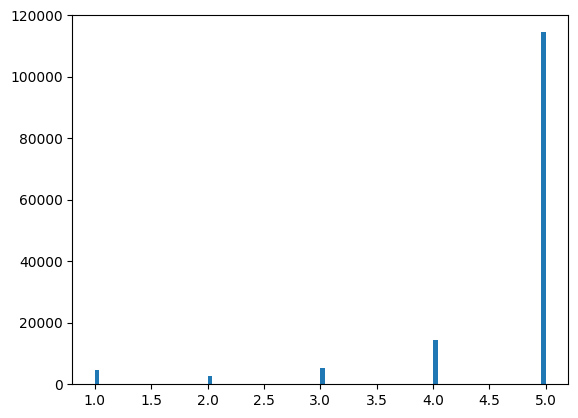

In [ ]:
plt.hist(df1['rating'], bins=100)

=> Dữ liệu lệch nhiều về những đánh giá có rating cao, đặc biệt là rating = 5

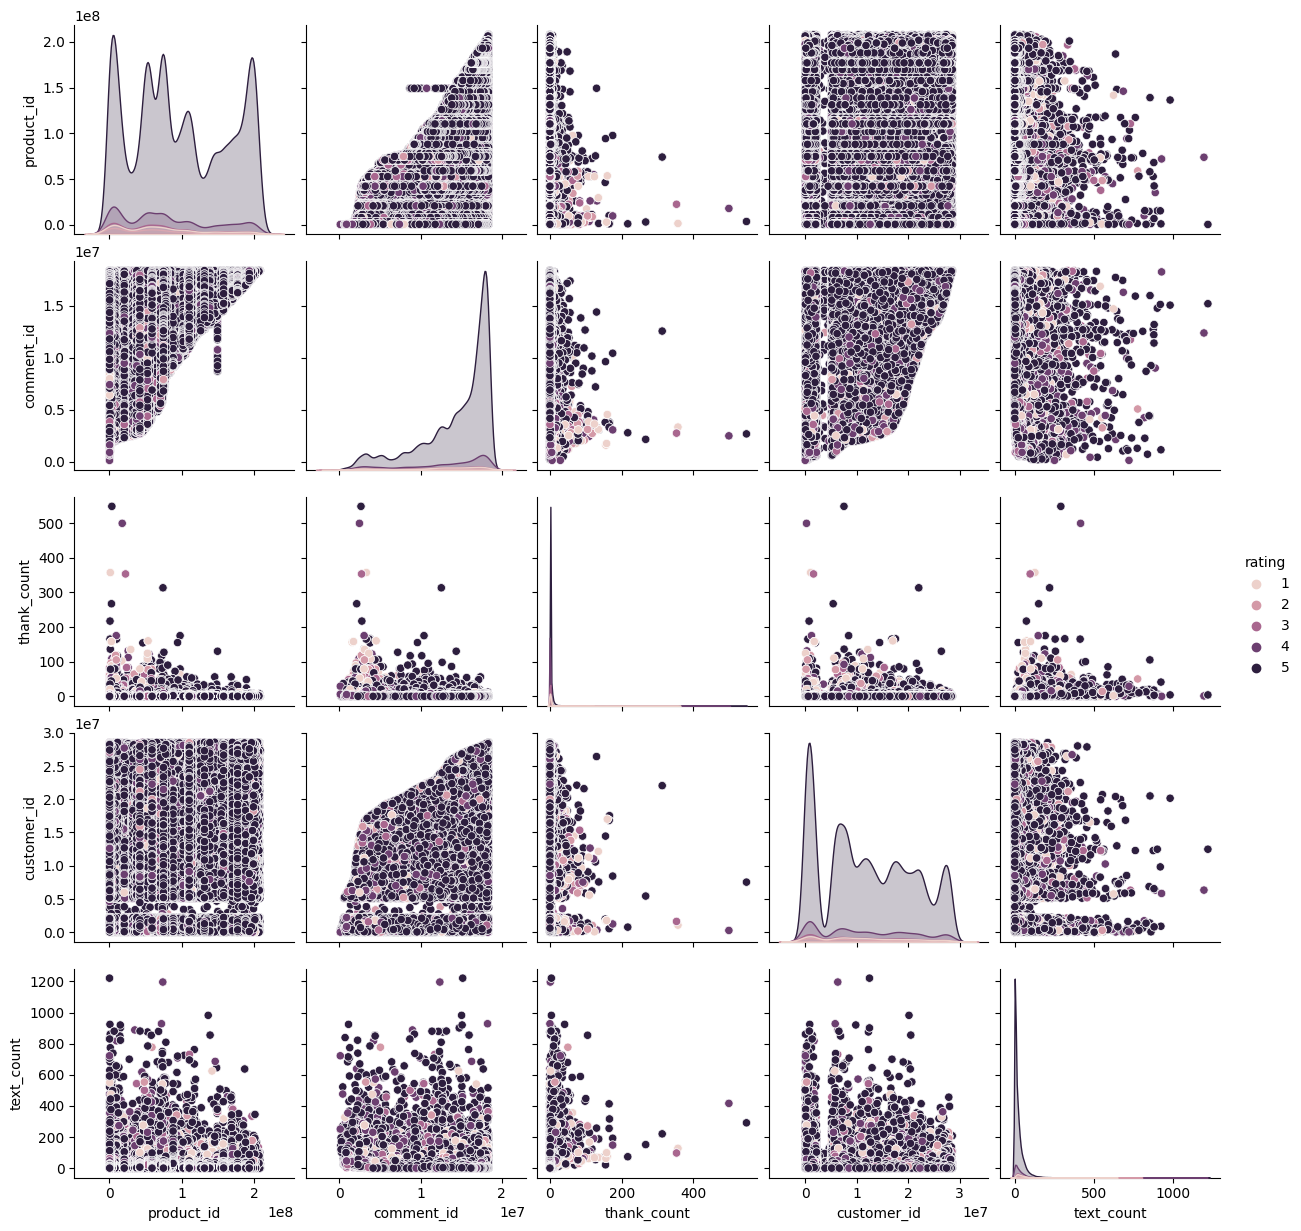

In [ ]:
#EDA for df1 about rating with other features
sns.pairplot(df1, hue='rating')
    